# Analysis of Virat Kohli in Test Matches

**Using data from Virat Kohli Performance in Test Matches·**

Author:Rohith Muthyala

In [47]:
#Importing all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data=pd.read_csv('F:/Kohli/kohli-centuries-test.csv')
type(data['Bat2']=='DNB')

pandas.core.series.Series

In [5]:
data.head()

,Bat1,Bat2,Runs,Wkts,Conc,Ct,St,Unnamed: 7,Opposition,Ground,Start Date
0,4,15,19,-,-,2,0,NaN,v West Indies,Kingston,20-Jun-11
1,0,27,27,-,-,2,0,NaN,v West Indies,Bridgetown,28-Jun-11
2,30,DNB,30,-,-,1,0,NaN,v West Indies,Roseau,6-Jul-11
3,52,63,115,0,9,2,0,NaN,v West Indies,Mumbai,22-Nov-11
4,11,0,11,-,-,2,0,NaN,v Australia,Melbourne,26-Dec-11


In [7]:
data[data.isnull()=='True'].count()


Bat1          0
Bat2          0
Runs          0
Wkts          0
Conc          0
Ct            0
St            0
Unnamed: 7    0
Opposition    0
Ground        0
Start Date    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bat1        69 non-null     object 
 1   Bat2        69 non-null     object 
 2   Runs        69 non-null     object 
 3   Wkts        69 non-null     object 
 4   Conc        69 non-null     object 
 5   Ct          69 non-null     int64  
 6   St          69 non-null     int64  
 7   Unnamed: 7  0 non-null      float64
 8   Opposition  69 non-null     object 
 9   Ground      69 non-null     object 
 10  Start Date  69 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 6.1+ KB


In [9]:
data['year'] = pd.DatetimeIndex(data['Start Date']).year


In [10]:
print("No. of Times Virat Kohli got out for 0:")
((data.Bat1 == '0') |  (data.Bat2 == '0')).sum()

No. of Times Virat Kohli got out for 0:


6

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bat1        69 non-null     object 
 1   Bat2        69 non-null     object 
 2   Runs        69 non-null     object 
 3   Wkts        69 non-null     object 
 4   Conc        69 non-null     object 
 5   Ct          69 non-null     int64  
 6   St          69 non-null     int64  
 7   Unnamed: 7  0 non-null      float64
 8   Opposition  69 non-null     object 
 9   Ground      69 non-null     object 
 10  Start Date  69 non-null     object 
 11  year        69 non-null     int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 6.6+ KB


In [12]:
data.head()

,Bat1,Bat2,Runs,Wkts,Conc,Ct,St,Unnamed: 7,Opposition,Ground,Start Date,year
0,4,15,19,-,-,2,0,NaN,v West Indies,Kingston,20-Jun-11,2011
1,0,27,27,-,-,2,0,NaN,v West Indies,Bridgetown,28-Jun-11,2011
2,30,DNB,30,-,-,1,0,NaN,v West Indies,Roseau,6-Jul-11,2011
3,52,63,115,0,9,2,0,NaN,v West Indies,Mumbai,22-Nov-11,2011
4,11,0,11,-,-,2,0,NaN,v Australia,Melbourne,26-Dec-11,2011


In [13]:
data['Opposition']=data['Opposition'].str.replace("v ","")
data['Bat1']=data['Bat1'].str.replace("DNB","0")
data['Bat1']=data['Bat1'].str.replace("T0","0")
data['Bat1']=data['Bat1'].str.replace("TDNB","0")
data['Bat1']=data['Bat1'].str.replace("-","0")
data['Bat1']=data['Bat1'].str.replace("*","")
data['Bat2']=data['Bat2'].str.replace("DNB","0")
data['Bat2']=data['Bat2'].str.replace("-","0")
data['Bat2']=data['Bat2'].str.replace("*","")
data

,Bat1,Bat2,Runs,Wkts,Conc,Ct,St,Unnamed: 7,Opposition,Ground,Start Date,year
0,4,15,19,-,-,2,0,NaN,West Indies,Kingston,20-Jun-11,2011
1,0,27,27,-,-,2,0,NaN,West Indies,Bridgetown,28-Jun-11,2011
2,30,0,30,-,-,1,0,NaN,West Indies,Roseau,6-Jul-11,2011
3,52,63,115,0,9,2,0,NaN,West Indies,Mumbai,22-Nov-11,2011
4,11,0,11,-,-,2,0,NaN,Australia,Melbourne,26-Dec-11,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
64,153,5,158,-,-,2,0,NaN,South Africa,Centurion,13-Jan-18,2018
65,54,41,95,-,-,0,0,NaN,South Africa,Johannesburg,24-Jan-18,2018
66,149,51,200,-,-,1,0,NaN,England,Birmingham,1-Aug-18,2018
67,23,17,40,-,-,0,0,NaN,England,Lord's,9-Aug-18,2018


In [14]:
Catches = data['Ct'].sum()
print (Catches)

65


**Virat Kohli has taken 65 catches in test matches**

In [15]:
type(data['Runs'])

pandas.core.series.Series

In [16]:
data['Conc']=data['Conc'].str.replace("-","0")

In [17]:
data["Conc"] = pd.to_numeric(data["Conc"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bat1        69 non-null     object 
 1   Bat2        69 non-null     object 
 2   Runs        69 non-null     object 
 3   Wkts        69 non-null     object 
 4   Conc        69 non-null     int64  
 5   Ct          69 non-null     int64  
 6   St          69 non-null     int64  
 7   Unnamed: 7  0 non-null      float64
 8   Opposition  69 non-null     object 
 9   Ground      69 non-null     object 
 10  Start Date  69 non-null     object 
 11  year        69 non-null     int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 6.6+ KB


In [18]:
runcon = data['Conc'].sum()
print (runcon)

76


**Virat Kohli conceded 76 runs without picking any wicket**

In [19]:
data['Runs']=data['Runs'].str.replace("-","0")
data["Runs"] = pd.to_numeric(data["Runs"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bat1        69 non-null     object 
 1   Bat2        69 non-null     object 
 2   Runs        69 non-null     int64  
 3   Wkts        69 non-null     object 
 4   Conc        69 non-null     int64  
 5   Ct          69 non-null     int64  
 6   St          69 non-null     int64  
 7   Unnamed: 7  0 non-null      float64
 8   Opposition  69 non-null     object 
 9   Ground      69 non-null     object 
 10  Start Date  69 non-null     object 
 11  year        69 non-null     int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 6.6+ KB


In [20]:
runsco = data['Runs'].sum()
print (runsco)

5994


**Virat kohli has scored 5994 runs in 69 Matches**

In [21]:
data["Bat2"] = pd.to_numeric(data["Bat2"])
runsin=data['Bat2'].sum()
print (runsin)

1917


**Virat Kohli has scored 1917 runs in second innings**

In [22]:
data["Bat1"] = pd.to_numeric(data["Bat1"])
runsin=data['Bat1'].sum()
print (runsin)

4077


**Virat Kohli has scored 4077 runs in first innings**

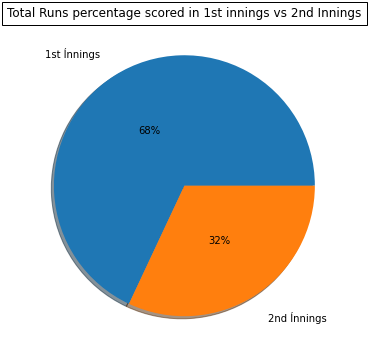

In [23]:
slices=[data['Bat1'].sum(),data['Bat2'].sum()]
labels=['1st Ínnings','2nd Ínnings']
plt.pie(slices, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Total Runs percentage scored in 1st innings vs 2nd Innings", bbox={'facecolor':'1', 'pad':5})

fig.set_size_inches(6,6)
plt.show()

In [24]:
print("Runs Scored against England:")
data[data["Opposition"]=="England"].Runs.sum()

Runs Scored against England:


1417

In [25]:
print("Runs Scored against South Africa:")
data[data["Opposition"]=="South Africa"].Runs.sum()

Runs Scored against South Africa:


758

In [26]:
print("Runs Scored against New Zealand:")
data[data["Opposition"]=="New Zealand"].Runs.sum()

Runs Scored against New Zealand:


735

In [27]:
print("Runs Scored against West Indies:")
data[data["Opposition"]=="West Indies"].Runs.sum()

Runs Scored against West Indies:


502

In [28]:
print("Runs Scored against Austrailia:")
data[data["Opposition"]=="Australia"].Runs.sum()

Runs Scored against Austrailia:


1322

In [29]:
print("Runs Scored against Srilanka:")
data[data["Opposition"]=="Sri Lanka"].Runs.sum()

Runs Scored against Srilanka:


1004

In [30]:
print("Runs Scored against Bangladesh:")
data[data["Opposition"]=="Bangladesh"].Runs.sum()

Runs Scored against Bangladesh:


256

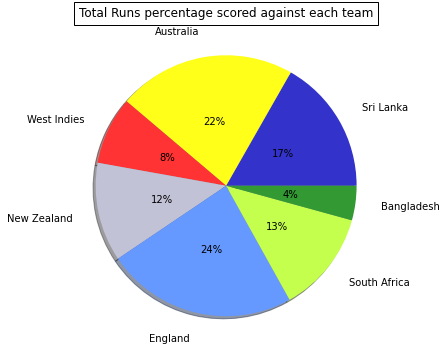

In [31]:
slices=[data[data["Opposition"]=="Sri Lanka"].Runs.sum(),
        data[data["Opposition"]=="Australia"].Runs.sum(),
        data[data["Opposition"]=="West Indies"].Runs.sum(),
        data[data["Opposition"]=="New Zealand"].Runs.sum(),
        data[data["Opposition"]=="England"].Runs.sum(),
       data[data["Opposition"]=="South Africa"].Runs.sum(),
       data[data["Opposition"]=="Bangladesh"].Runs.sum(),]
labels=['Sri Lanka','Australia','West Indies','New Zealand','England','South Africa','Bangladesh']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Total Runs percentage scored against each team", bbox={'facecolor':'1', 'pad':5})

fig.set_size_inches(6,6)
plt.show()


In [32]:
count1=data[data["Bat1"]>=100].shape[0]
print("No. of Centuries Scored by Virat Kohli in 1st Innings is:")
print (count1)

No. of Centuries Scored by Virat Kohli in 1st Innings is:
18


In [33]:
count2=data[data["Bat2"]>=100].shape[0]
print("No. of Centuries Scored by Virat Kohli in 2nd Innings is:")
print (count2)

No. of Centuries Scored by Virat Kohli in 2nd Innings is:
5


In [34]:
count1=data[data["Bat1"]>=100].shape[0]
count2=data[data["Bat2"]>=100].shape[0]
count_Total=count1 + count2
print("Total No. of Centuries Scored by Virat Kohli")
print (count_Total)


Total No. of Centuries Scored by Virat Kohli
23


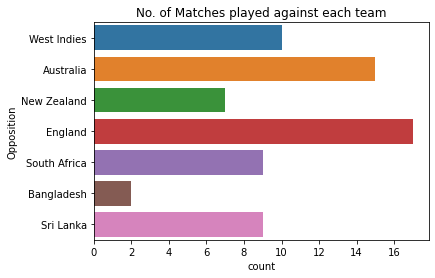

<Figure size 1440x1152 with 0 Axes>

In [35]:
sns.countplot(y=data["Opposition"])
plt.title("No. of Matches played against each team")
plt.figure(figsize=(20,16))

plt.show()

<Figure size 720x432 with 0 Axes>

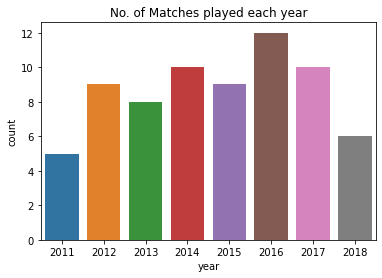

<Figure size 720x432 with 0 Axes>

In [36]:
sns.countplot(x=data["year"])
plt.title("No. of Matches played each year")
plt.figure(figsize=(10,6))

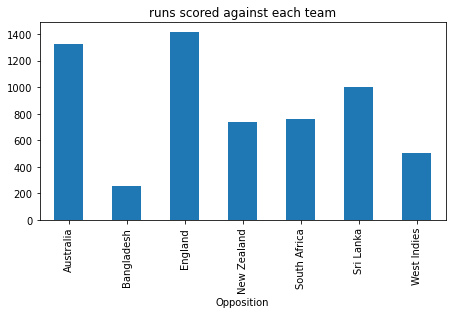

In [37]:
fig = plt.figure(figsize=(16,8))  
fig.add_subplot(221)
data.groupby('Opposition').Runs.sum().plot(kind='bar',title='runs scored against each team')

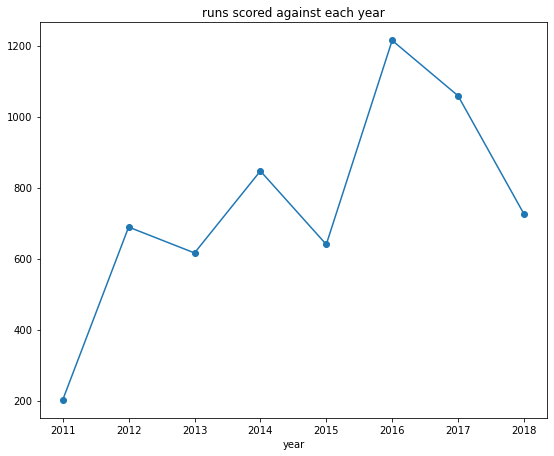

In [38]:
fig = plt.figure(figsize=(20,16))  
fig.add_subplot(221)
data.groupby('year').Runs.sum().plot(marker='o',title='runs scored against each year')

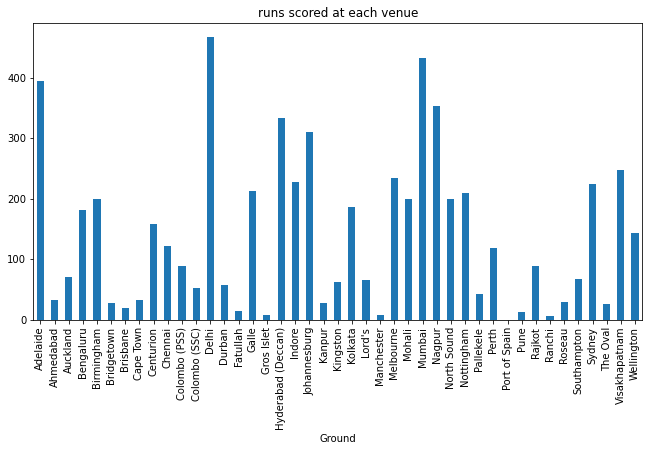

In [39]:
fig = plt.figure(figsize=(24,12))  
ax=fig.add_subplot(221)
data.groupby('Ground').Runs.sum().plot(kind='bar',title='runs scored at each venue')

In [40]:
print('Total venues played at:',data['Ground'].nunique())

Total venues played at: 43


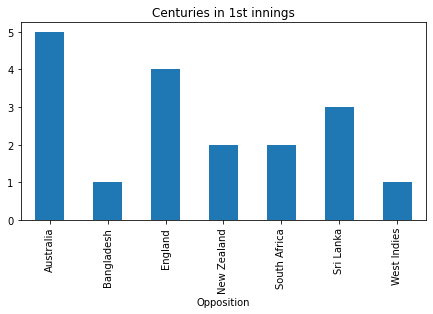

In [41]:
Inn1=data["Bat1"]>=100
data1=data[Inn1]
fig = plt.figure(figsize=(16,8))  
fig.add_subplot(221)
data1.groupby('Opposition').Bat1.count().plot(kind='bar',title='Centuries in 1st innings')

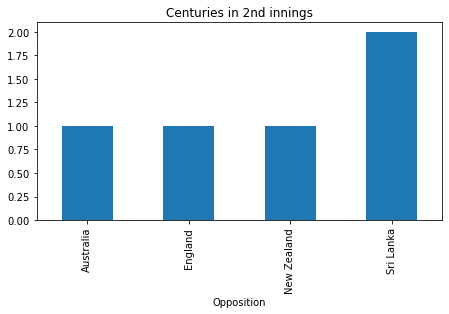

In [42]:
Inn2=data["Bat2"]>=100
data1=data[Inn2]
fig = plt.figure(figsize=(16,8))  
fig.add_subplot(221)
data1.groupby('Opposition').Bat2.count().plot(kind='bar',title='Centuries in 2nd innings')

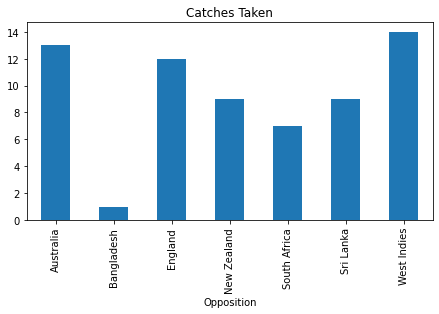

In [43]:
fig = plt.figure(figsize=(16,8))  
fig.add_subplot(221)
data.groupby('Opposition').Ct.sum().plot(kind='bar',title='Catches Taken')

In [44]:
Inn1=data["Bat1"]>=200
data[Inn1]

,Bat1,Bat2,Runs,Wkts,Conc,Ct,St,Unnamed: 7,Opposition,Ground,Start Date,year
41,200,0,200,-,0,2,0,NaN,West Indies,North Sound,21-Jul-16,2016
47,211,17,228,-,0,2,0,NaN,New Zealand,Indore,8-Oct-16,2016
51,235,0,235,-,0,2,0,NaN,England,Mumbai,8-Dec-16,2016
53,204,38,242,-,0,1,0,NaN,Bangladesh,Hyderabad (Deccan),9-Feb-17,2017
61,213,0,213,-,0,1,0,NaN,Sri Lanka,Nagpur,24-Nov-17,2017
62,243,50,293,0,1,0,0,NaN,Sri Lanka,Delhi,2-Dec-17,2017


In [45]:
print ("No. of Double Centuries Score by Virat Kohli in 1st innings")
data[Inn1].shape[0]

No. of Double Centuries Score by Virat Kohli in 1st innings


6

In [46]:
Inn2=data["Bat2"]>=200
print ("No. of Double Centuries Score by Virat Kohli in 2nd innings")
data[Inn2].shape[0]

No. of Double Centuries Score by Virat Kohli in 2nd innings


0

**Virat Kohli has scored 0 double centuries in 2st innings**